# This file includes the genomes that are filtered by genome statistic
- no "plasmid" is included

In [1]:
pan_df = '/home/hermuba/data0118/cdhit/clstr/pangenome_df/Escherichia0.70rm_plasmid.clstr.csv'
from Genome.pangenome_intrinsic_info.count_core_acc import *

In [2]:
count, pan_size, df = gene_distribution(pan_df)

In [3]:
# number of genes
len(count)

31622

In [4]:
# number_of_species
pan_size

1580

In [5]:
df.shape

(31622, 1580)

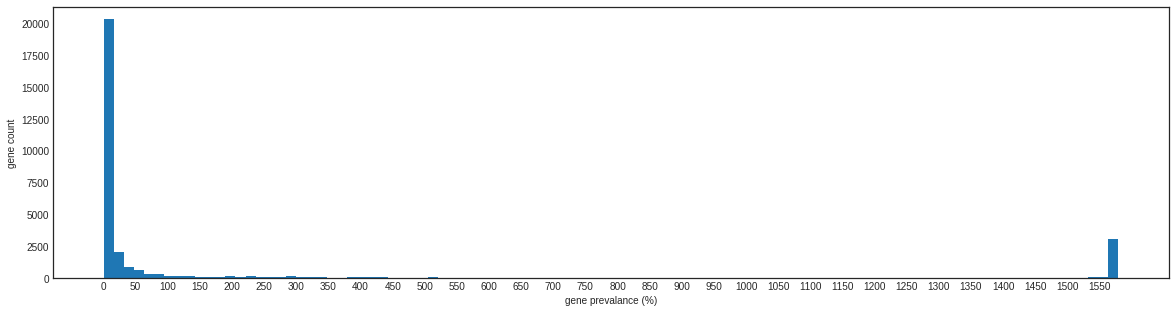

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("seaborn-white")
fig, ax = plt.subplots(figsize = (20,5))
n, bins, patches = ax.hist(count, bins = 100)
ax.set_xlabel('gene prevalance (%)')
ax.set_xticks(range(0,1580,50))

ax.set_ylabel('gene count')

plt.savefig('/home/hermuba/data0118/fig/gene_prevalance.pdf', format = 'pdf', dpi = 300)

In [7]:
bins/pan_size # last bar: 99% of organism has it

array([0.        , 0.00999367, 0.01998734, 0.02998101, 0.03997468,
       0.04996835, 0.05996203, 0.0699557 , 0.07994937, 0.08994304,
       0.09993671, 0.10993038, 0.11992405, 0.12991772, 0.13991139,
       0.14990506, 0.15989873, 0.16989241, 0.17988608, 0.18987975,
       0.19987342, 0.20986709, 0.21986076, 0.22985443, 0.2398481 ,
       0.24984177, 0.25983544, 0.26982911, 0.27982278, 0.28981646,
       0.29981013, 0.3098038 , 0.31979747, 0.32979114, 0.33978481,
       0.34977848, 0.35977215, 0.36976582, 0.37975949, 0.38975316,
       0.39974684, 0.40974051, 0.41973418, 0.42972785, 0.43972152,
       0.44971519, 0.45970886, 0.46970253, 0.4796962 , 0.48968987,
       0.49968354, 0.50967722, 0.51967089, 0.52966456, 0.53965823,
       0.5496519 , 0.55964557, 0.56963924, 0.57963291, 0.58962658,
       0.59962025, 0.60961392, 0.61960759, 0.62960127, 0.63959494,
       0.64958861, 0.65958228, 0.66957595, 0.67956962, 0.68956329,
       0.69955696, 0.70955063, 0.7195443 , 0.72953797, 0.73953

In [8]:
# define core
thres = extended_core(n, bins) # 1563

In [9]:
thres # any gene cluster with more than this gene count (the extended core definition) will be classify as "core"

1563.2099999999998

# Remove one genome that has less than 4000 genes
although we use quast to check, quast return NaN in genome stats. That's why we miss it.

In [10]:
df.columns[df.sum(axis = 0)<4000] # only ~400 genes; WTF; annotated as WGS in PATRIC, quast NaN!!! WTF, "PacBio"

Index(['562.22426'], dtype='object')

In [11]:
grow = pangenome_profile(df.iloc[:, :100])

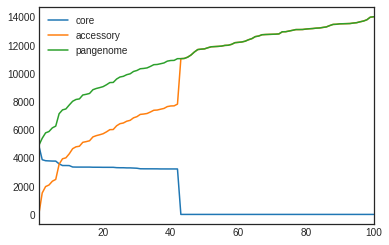

In [12]:
grow.plot() # this growth plot is deprecated because of that pacbio genome!

# Let's remove the PacBio genome and recalculate everything again :)

In [13]:
df.drop(axis = 1, columns = '562.22426', inplace = True)

In [14]:
count = df.sum(axis = 1)
pan_size = df.shape[1]

In [15]:
# count = pangenome size
len(count)

31622

In [16]:
pan_size # removed one genome

1579

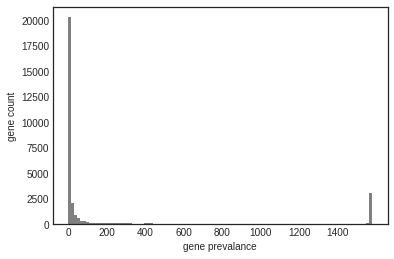

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("seaborn-colorblind")
fig, ax = plt.subplots()
n, bins, patches = ax.hist(count, bins = 100, color = 'grey')
ax.set_xlabel('gene prevalance')
ax.set_xticks(range(0,1580,200))

ax.set_ylabel('gene count')

plt.savefig('/home/hermuba/data0118/fig/fig_11_gene_prevalance.pdf', format = 'pdf', dpi = 300)

In [18]:
# define core
thres = extended_core(n, bins) # 1563

In [19]:
thres

1563.2099999999998

In [20]:
grow = pangenome_profile(df.iloc[:, :100])

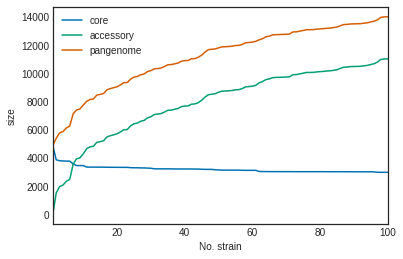

In [21]:
fig, ax = plt.subplots()
ax.set_xlabel('No. strain')
ax.set_ylabel('size')
grow.plot(ax = ax)
plt.savefig('/home/hermuba/data0118/fig/fig_10_pangenome_growth.pdf', format = 'pdf', dpi = 300)

In [22]:
# core genome size
sum_df = df.sum(axis = 1)
len(sum_df.loc[sum_df >= thres])

3094

In [23]:
len(sum_df.loc[sum_df < thres]) # accessory

28528

In [24]:
len(sum_df)

31622

In [25]:
df.shape

(31622, 1579)

# Summary:
- genome inclusion criteria: no plasmid, remove 1 PacBio genome with less than 4000 genes by hand.
- No. strain = 1579
- Pangenome size = 31622
- Core definition: Extended core (99%)
- Number of core: 3094
- Number of accessory: 28328